# Dimensional Resemblance Analysis (DRA) Dataset E

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
import hoggorm as ho
import numpy as np
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import umap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/E_PimaIndiansDiabetes_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/E_PimaIndiansDiabetes_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/E_PimaIndiansDiabetes_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/E_PimaIndiansDiabetes_Synthetic_WGANGP.csv'}
categorical_columns = ['Outcome']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              2       84              0              0        0   0.0   
 1              9      112             82             24        0  28.2   
 2              1      139             46             19       83  28.7   
 3              0      161             50              0        0  21.9   
 4              6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 609            5      139             64             35      140  28.6   
 610            1       96            122              0        0  22.4   
 611           10      101             86             37        0  45.6   
 612            0      141              0              0        0  42.4   
 613            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age Outcome  
 0                       0.304   21       0 

## 2. Preprocess variables for data reduction

In [5]:
data_scaled = dict()
for name in tqdm(DATA_TYPES) :
    data_scaled[name] = preprocess_data(data[name])
    print(name, ':', data_scaled[name].shape)
data_scaled

100%|██████████| 5/5 [00:00<00:00, 140.07it/s]

Real : (614, 10)
GM : (614, 10)
SDV : (614, 10)
CTGAN : (614, 10)
WGANGP : (614, 10)


{'Real': array([[-0.52639686, -1.15139792, -3.75268255, ..., -1.03594038,
          1.        ,  0.        ],
        [ 1.58804586, -0.27664283,  0.68034485, ...,  1.48710085,
          0.        ,  1.        ],
        [-0.82846011,  0.56687102, -1.2658623 , ..., -0.94893896,
          1.        ,  0.        ],
        ...,
        [ 1.8901091 , -0.62029661,  0.89659009, ...,  0.44308379,
          0.        ,  1.        ],
        [-1.13052335,  0.62935353, -3.75268255, ..., -0.33992901,
          0.        ,  1.        ],
        [-1.13052335,  0.12949347,  1.43720319, ..., -1.03594038,
          1.        ,  0.        ]]),
 'GM': array([[ 2.1346797 ,  0.62257231, -0.11412872, ...,  1.04399655,
          1.        ,  0.        ],
        [-1.06923734, -0.28458993, -0.32253032, ..., -0.74829726,
          1.        ,  0.        ],
        [ 0.38708859, -1.00406342,  0.40687526, ...,  2.65706097,
          0.        ,  1.        ],
        ...,
        [-0.77797216, -1.62969255,  0.09

## 3. Principal Component Analysis (PCA)

In [6]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':           PC1       PC2  Label
 0   -4.914936  0.175430    0.0
 1    1.290432  1.694671    0.0
 2   -0.818917 -1.065309    0.0
 3   -0.882909  2.144481    0.0
 4    3.002287 -0.281449    0.0
 ..        ...       ...    ...
 609  0.256466 -0.605904    0.0
 610 -1.239758  0.581624    0.0
 611  2.138287  0.492590    0.0
 612 -1.531644 -0.400947    0.0
 613 -1.498715  0.056617    0.0
 
 [614 rows x 3 columns],
 'GM':           PC1       PC2  Label
 0    1.033062  2.353791    1.0
 1    1.427209 -0.981629    1.0
 2    0.936444  2.338809    1.0
 3   -0.064483  0.212578    1.0
 4   -0.159071 -0.787850    1.0
 ..        ...       ...    ...
 609 -1.154682  0.423706    1.0
 610  0.684344  0.045604    1.0
 611  2.806586 -0.765518    1.0
 612 -0.244749 -0.431555    1.0
 613  0.228672  0.302579    1.0
 
 [614 rows x 3 columns],
 'SDV':           PC1       PC2  Label
 0    3.454071  0.812804    1.0
 1    1.861842  0.073706    1.0
 2    0.000648  1.976793    1.0
 3    2.180811  1.044234    1

GM
- Joint distance:  0.0642
SDV
- Joint distance:  0.0141
CTGAN
- Joint distance:  0.3017
WGANGP
- Joint distance:  0.2335


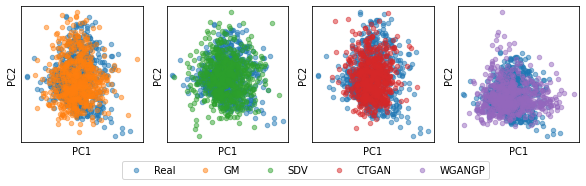

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
pca_real = pca['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    pca_data = pd.DataFrame(data=pca['Real'], columns=['PC1','PC2','Label']).append(pca[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = pca_data['Label'] == target
        handles = ax.scatter(pca_data.loc[indicesToKeep, 'PC1'], pca_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        pca_synthetic = pca[name][['PC1','PC2']]
    
    print(name)
    joint_dist = dra_distance(pca_real, pca_synthetic)
    print('- Joint distance: ', joint_dist)
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/PCA_PLOTS.png', bbox_inches='tight')

## 4. ISOMAP

In [8]:
isomap = dict()
isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':           PC1       PC2  Label
 0    1.356921  9.670588    0.0
 1   -0.276055 -3.642216    0.0
 2   -0.785653  2.899246    0.0
 3    6.385206 -0.436265    0.0
 4   -5.769291 -3.629510    0.0
 ..        ...       ...    ...
 609 -1.425181  0.658419    0.0
 610  2.839177  1.983481    0.0
 611 -2.108076 -3.959812    0.0
 612  2.528900  7.796781    0.0
 613  2.811739  2.005572    0.0
 
 [614 rows x 3 columns],
 'GM':           PC1       PC2  Label
 0    0.355624  0.589402    1.0
 1    3.110736  0.991836    1.0
 2   -2.554187  1.916699    1.0
 3   -2.392196  0.820919    1.0
 4   -1.324906  6.619481    1.0
 ..        ...       ...    ...
 609 -4.503187  0.422965    1.0
 610  2.171279  0.290817    1.0
 611  5.069250  1.190265    1.0
 612  0.524042 -3.378114    1.0
 613  1.989137 -0.324579    1.0
 
 [614 rows x 3 columns],
 'SDV':           PC1       PC2  Label
 0   -3.411984  3.835302    1.0
 1   -3.612527  1.332142    1.0
 2    2.616198  2.375361    1.0
 3   -2.429939  3.694417    1

GM
- Joint distance:  0.4131
SDV
- Joint distance:  0.6389
CTGAN
- Joint distance:  0.5235
WGANGP
- Joint distance:  0.7521


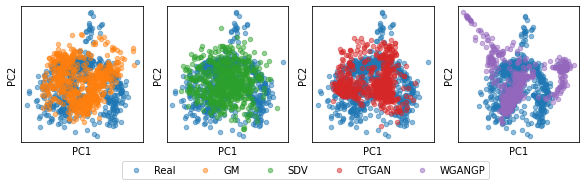

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
isomap_real = isomap['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    isomap_data = pd.DataFrame(data=isomap['Real'], columns=['PC1','PC2','Label']).append(isomap[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = isomap_data['Label'] == target
        handles = ax.scatter(isomap_data.loc[indicesToKeep, 'PC1'], isomap_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        isomap_synthetic = isomap[name][['PC1','PC2']]
        
    print(name)
    joint_dist = dra_distance(isomap_real, isomap_synthetic)
    print('- Joint distance: ', joint_dist)
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/ISOMAP_PLOTS.png', bbox_inches='tight')